# Analyzing Parcels around Stations

The point of this code is to analyze the parcels around our five stations to see what the typical size is

In [1]:
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)

import pandas as pd, numpy as np
from shapely.geometry import Polygon
from shapely.geometry import Point
import geopandas

import matplotlib.pyplot as plt

### Define Station Coordinates here

These dataframes allow us to keep only parcels whose centroids are within a half mile of the station

In [2]:
#col_station = geopandas.GeoSeries([Point([(-122.196868999999, 37.753661)])])
fruit_station = geopandas.GeoSeries([Point([(-122.224175, 37.774836)])])
mp_station = geopandas.GeoSeries([Point([(-122.182405, 37.454745)])])
soto_station = geopandas.GeoSeries([Point([(-118.210061, 34.0437469999999)])])
#wv_station = geopandas.GeoSeries([Point([(-118.290082, 34.062701)])])
sl_station = geopandas.GeoSeries([Point([(-118.25518, 34.093765)])])

#col_station = geopandas.GeoDataFrame({'geometry': col_station, 'col_station':['coliseum']})
fruit_station = geopandas.GeoDataFrame({'geometry': fruit_station, 'fruit_station':['fruitvale']})
mp_station = geopandas.GeoDataFrame({'geometry': mp_station, 'mp_station':['menlo']})
soto_station = geopandas.GeoDataFrame({'geometry': soto_station, 'soto_station':['soto']})
#wv_station = geopandas.GeoDataFrame({'geometry': wv_station, 'wv_station':['wilshire / vermont']})
sl_station = geopandas.GeoDataFrame({'geometry': sl_station, 'sl_station':['silver lake']})

sl_station

,geometry,sl_station
0,POINT (-118.25518 34.093765),silver lake


In [3]:
print(fruit_station.crs)

fruit_station.crs = {'init': 'epsg:4269'}
mp_station.crs = {'init': 'epsg:4269'}
soto_station.crs = {'init': 'epsg:4269'}
#wv_station.crs = {'init': 'epsg:4269'}
sl_station.crs = {'init': 'epsg:4269'}
 
print(fruit_station.crs)

mtc_crs = '+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs '
fruit_station = fruit_station.to_crs(mtc_crs)
mp_station = mp_station.to_crs(mtc_crs)
soto_station = soto_station.to_crs(mtc_crs)
#wv_station = wv_station.to_crs(mtc_crs)
sl_station = sl_station.to_crs(mtc_crs)

print(fruit_station.crs)

None
{'init': 'epsg:4269'}
+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs 


### Oakland Fruitvale Parcels

Let's keep
- Single-Family Residential
- Multi-Family Residential
- TOD
- Commercial
- Mix

In [4]:
parcel_path = 'GIS/Station_Parcels/' # select folder with data in it
zoning_path = 'GIS/Zoning/Export/' # select folder with data in it
fruit_parcels = geopandas.read_file(parcel_path + 'fruitvale_parcels.shp')

print(fruit_parcels.crs)
fruit_parcels = fruit_parcels.to_crs(mtc_crs)
print(fruit_parcels.crs)

fruit_parcels.head(3)

{'init': 'epsg:4269'}
+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs 


,apn,apn_sort,book,centroid_x,centroid_y,clca_categ,comments,date_creat,date_updat,fid_parcel,page,parcel,sub_parcel,key,name,lat,lon,geometry
0,25-724-11-1,025 072401101,25,6.063261e+06,2.111834e+06,None,None,2004-06-07,2004-06-07,9222.0,724,11,1,Bay Area Rapid TransitFTVL,Fruitvale BART,37.774836,-122.224175,"POLYGON ((568261.4580825844 4181961.418248375,..."
1,34-2300-13-5,034 230001305,34,6.063916e+06,2.104871e+06,None,None,2004-05-04,2004-05-04,9264.0,2300,13,5,Bay Area Rapid TransitFTVL,Fruitvale BART,37.774836,-122.224175,"POLYGON ((568578.6662869183 4179885.95895031, ..."
2,34-2304-15,034 230401500,34,6.064540e+06,2.104800e+06,None,None,2004-05-04,2007-04-05,9390.0,2304,15,None,Bay Area Rapid TransitFTVL,Fruitvale BART,37.774836,-122.224175,"POLYGON ((568764.1946908216 4179783.596750057,..."


I want to switch from using the polygon shape as the geometry to using the centroid since the parcels may not line up exactly with the zoning shapes

In [5]:
fruit_parcels['centroid'] = fruit_parcels.centroid
fruit_parcels = fruit_parcels.set_geometry('centroid')
fruit_parcels.head(2)

,apn,apn_sort,book,centroid_x,centroid_y,clca_categ,comments,date_creat,date_updat,fid_parcel,page,parcel,sub_parcel,key,name,lat,lon,geometry,centroid
0,25-724-11-1,025 072401101,25,6.063261e+06,2.111834e+06,None,None,2004-06-07,2004-06-07,9222.0,724,11,1,Bay Area Rapid TransitFTVL,Fruitvale BART,37.774836,-122.224175,"POLYGON ((568261.4580825844 4181961.418248375,...",POINT (568268.8731335454 4181921.716329793)
1,34-2300-13-5,034 230001305,34,6.063916e+06,2.104871e+06,None,None,2004-05-04,2004-05-04,9264.0,2300,13,5,Bay Area Rapid TransitFTVL,Fruitvale BART,37.774836,-122.224175,"POLYGON ((568578.6662869183 4179885.95895031, ...",POINT (568524.4427652368 4179810.958971615)


In [6]:
fruitvale_zoning = geopandas.read_file(zoning_path + 'fruitvale_zoning.shp')

fruitvale_zoning.head(1)

,FID,OBJECTID,AREA,PERIMETER,BASEZONE,OVERLAY,ZNLABEL,ORDINANCE,LASTUPDATE,GLOBALID,SHAPE_AREA,SHAPE_LEN,Shape__Are,Shape__Len,key,name,lat,lon,zone_base,geometry
0,9,1004,5.125752e+06,21548.117093,RM-2,None,RM-2,None,20180327,{40B2A992-AA3E-4384-8556-504AA205D405},5.125752e+06,21548.117079,0.000049,0.066699,Bay Area Rapid TransitFTVL,Fruitvale BART,37.774836,-122.224175,Multi-Family Residential,POLYGON ((-122.2268891196943 37.78738723444862...


In [7]:
fruit_zoning = fruitvale_zoning.iloc[:,4:7]

fruit_zoning['zone_base'] = fruitvale_zoning['zone_base']
fruit_zoning['geometry'] = fruitvale_zoning['geometry']

fruit_zoning = fruit_zoning.to_crs(mtc_crs)

print(fruit_zoning.crs)
print(type(fruit_zoning))
fruit_zoning.head(3)

+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs 
<class 'geopandas.geodataframe.GeoDataFrame'>


,BASEZONE,OVERLAY,ZNLABEL,zone_base,geometry
0,RM-2,None,RM-2,Multi-Family Residential,"POLYGON ((568073.088522448 4182507.036305683, ..."
1,RM-4,/C,RM-4/C,Multi-Family Residential,"POLYGON ((568532.807792973 4182276.586780226, ..."
2,OS (AMP),None,OS (AMP),Open Space,"POLYGON ((568929.9146873901 4181347.345295901,..."


In [8]:
fruit_pz = geopandas.sjoin(fruit_parcels, fruit_zoning, how='left')

fruit_pz.head()

,apn,apn_sort,book,centroid_x,centroid_y,clca_categ,comments,date_creat,date_updat,fid_parcel,...,name,lat,lon,geometry,centroid,index_right,BASEZONE,OVERLAY,ZNLABEL,zone_base
0,25-724-11-1,025 072401101,25,6.063261e+06,2.111834e+06,None,None,2004-06-07,2004-06-07,9222.0,...,Fruitvale BART,37.774836,-122.224175,"POLYGON ((568261.4580825844 4181961.418248375,...",POINT (568268.8731335454 4181921.716329793),33.0,RM-2,None,RM-2,Multi-Family Residential
1,34-2300-13-5,034 230001305,34,6.063916e+06,2.104871e+06,None,None,2004-05-04,2004-05-04,9264.0,...,Fruitvale BART,37.774836,-122.224175,"POLYGON ((568578.6662869183 4179885.95895031, ...",POINT (568524.4427652368 4179810.958971615),9.0,D-CE-5,None,D-CE-5,Industrial
2,34-2304-15,034 230401500,34,6.064540e+06,2.104800e+06,None,None,2004-05-04,2007-04-05,9390.0,...,Fruitvale BART,37.774836,-122.224175,"POLYGON ((568764.1946908216 4179783.596750057,...",POINT (568714.7006482405 4179792.71154888),51.0,D-CE-6,None,D-CE-6,Industrial
3,34-2304-10-1,034 230401001,34,6.064427e+06,2.105071e+06,None,None,2004-05-04,2007-04-05,9391.0,...,Fruitvale BART,37.774836,-122.224175,"POLYGON ((568742.4744763509 4179894.111969307,...",POINT (568679.1601123092 4179870.964593579),51.0,D-CE-6,None,D-CE-6,Industrial
4,25-725-22-1,025 072502201,25,6.063187e+06,2.112069e+06,None,None,2004-06-07,2007-04-05,9392.0,...,Fruitvale BART,37.774836,-122.224175,"POLYGON ((568232.996558834 4182027.23258027, 5...",POINT (568244.4501333099 4181992.711825416),33.0,RM-2,None,RM-2,Multi-Family Residential


In [9]:
len(fruit_pz[fruit_pz['zone_base'].isnull()])

778

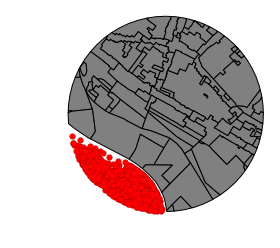

In [10]:
#Parcels missing zoning data are all in Alameda and that's okay since it falls outside of 1/2 mile radius

f, ax = plt.subplots(1, figsize=(4, 4))
ax = fruit_zoning.plot(ax = ax, color='gray', edgecolor='black', linewidth=1)
ax = fruit_pz[fruit_pz['zone_base'].isnull()].plot(ax = ax, color='red', edgecolor='black', linewidth=.1)
#DPI=300
ax.set_axis_off()
#ax.set_title('Qualifying Bus Stops in CA')
plt.show()

### Menlo Park Parcels

Already have zoning information attached, but doesn't have the atherton parcels in it so we still need to do the merge

Let's keep for housing related-zoning:
- Multi-Family Residential
- Single-Family Residential
- El Camino Real/Downtown Specific Plan

In [11]:
mp_parcels = geopandas.read_file(parcel_path + 'mp_parcels.shp')

print(mp_parcels.crs)
mp_parcels = mp_parcels.to_crs(mtc_crs)
print(mp_parcels.crs)
print(len(mp_parcels))

mp_parcels['centroid'] = mp_parcels.centroid
mp_parcels = mp_parcels.set_geometry('centroid')

mp_parcels.head(1)

{'init': 'epsg:4269'}
+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs 
3667


,APAGE,APN,APN_FLAG,BLOCK,BOOK,LOT,SBE_NO,SUBLOT,PARCEL_ID,PERIMETER,...,SRC_FINL_S,TRACT_ID,TRANSFER,PROPERTY_R,key,name,lat,lon,geometry,centroid
0,48,114480020,V,0,114,020,None,None,4013174,382.85,...,None,999.0,None,http://maps.smcgov.org/GE_4_4_0_Html5Viewer_2_...,Caltrain70162,Menlo Park Caltrain,37.454745,-122.182405,"POLYGON ((572420.8779099183 4144634.749978957,...",POINT (572398.656118247 4144640.1212049)


In [12]:
mp_zoning = geopandas.read_file(zoning_path + 'mp_zoning.shp')

print(mp_zoning.crs)
mp_zoning = mp_zoning.to_crs(mtc_crs)
print(mp_zoning.crs)
print(len(mp_zoning))

mp_zoning.head(1)

{'init': 'epsg:4269'}
+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs 
2933


,apn,fld_firm_z,gp_values1,gpz_gen_pl,gpz_z_labe,lot_tot_po,parcelid,prc_legal_,prc_puc_co,prc_situs1,prc_situs_,prc_tax_co,site_addre,key,name,lat,lon,zone_base,geometry
0,071402110,X,Residential Low Density,RL,R1U,7500.02,23-7863,LOT 5 BLOCK 6 STANFORD PARK 2,01,94025,MENLO PARK,008,253 UNIVERSITY DR,Caltrain70162,Menlo Park Caltrain,37.454745,-122.182405,Single-Family Residential,"POLYGON ((572708.9430673699 4144539.242950584,..."


In [13]:
mp_zone = mp_zoning.iloc[:,0:5]

mp_zone['zone_base'] = mp_zoning['zone_base']
mp_zone['geometry'] = mp_zoning['geometry']

mp_zone.head(3)

,apn,fld_firm_z,gp_values1,gpz_gen_pl,gpz_z_labe,zone_base,geometry
0,071402110,X,Residential Low Density,RL,R1U,Single-Family Residential,"POLYGON ((572708.9430673699 4144539.242950584,..."
1,071051230,X,Residential Very Low Density,RVL,RE,Single-Family Residential,"POLYGON ((571520.0327643342 4144499.803997708,..."
2,071424190,X,Residential Low Density,RL,R1U,Single-Family Residential,"POLYGON ((572847.0280393786 4144527.478795401,..."


In [14]:
mp_pz = geopandas.sjoin(mp_parcels, mp_zone, how='left')

print(len(mp_pz))

mp_pz.head(3)

3674


,APAGE,APN,APN_FLAG,BLOCK,BOOK,LOT,SBE_NO,SUBLOT,PARCEL_ID,PERIMETER,...,lon,geometry,centroid,index_right,apn,fld_firm_z,gp_values1,gpz_gen_pl,gpz_z_labe,zone_base
0,48,114480020,V,0,114,020,None,None,4013174,382.85,...,-122.182405,"POLYGON ((572420.8779099183 4144634.749978957,...",POINT (572398.656118247 4144640.1212049),2826.0,114480999,X,Residential Medium Density,RM,R3,Multi-Family Residential
1,48,114480010,V,0,114,010,None,None,4013174,382.85,...,-122.182405,"POLYGON ((572420.8779099183 4144634.749978957,...",POINT (572398.656118247 4144640.1212049),2826.0,114480999,X,Residential Medium Density,RM,R3,Multi-Family Residential
2,38,114380020,V,0,114,020,None,None,4010294,334.00,...,-122.182405,"POLYGON ((572005.9293552948 4145117.434748435,...",POINT (571986.2734703874 4145123.550357357),2164.0,114380999,X,El Camino Real/Downtown Specific Plan,ECRDSP,SP-ECR-D,El Camino Real/Downtown Specific Plan


In [15]:
len(mp_pz[mp_pz['zone_base'].isnull()])

442

In [16]:
mp_pz[['zone_base']] = mp_pz[['zone_base']].fillna(value='Single-Family Residential')
len(mp_pz[mp_pz['zone_base'].isnull()])

0

### Now to load LA parcels and add zoning information to them

We want to keep from LA zoning codes:
- Residential Estate
- One-Family Residential
- Multi-Family Residential
- Commercial

In [37]:
la_parcels = geopandas.read_file(parcel_path + 'la_parcels.shp')

print(la_parcels.crs)
la_parcels = la_parcels.to_crs(mtc_crs)
print(la_parcels.crs)
print(len(la_parcels))

la_parcels['centroid'] = la_parcels.centroid
la_parcels = la_parcels.set_geometry('centroid')

la_parcels.head(1)

{'init': 'epsg:4269'}
+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs 
22584


,arb,assetid,block,bpp,cncl_dist,date_crtn_,time_crtn_,eng_dist,eng_dist_d,id,...,pind,shape_area,shape_leng,tract,key,name,lat,lon,geometry,centroid
0,8,1310563.0,None,5438023010,4,1992-11-17,00:00:00.000,C,Central,1.0,...,150A209-1,161470.71767,2476.173211,RANCHO LOS FELIS,Metro - Los Angeles89,Allesandro / Oak Glen,34.093765,-118.25518,"POLYGON ((937602.2070436613 3784116.347889483,...",POINT (937579.0402772112 3784103.298228906)


In [38]:
la_zoning = geopandas.read_file(zoning_path + 'la_zoning.shp')

print(la_zoning.crs)
la_zoning = la_zoning.to_crs(mtc_crs)
print(la_zoning.crs)
print(len(la_zoning))

la_zoning.head(1)

{'init': 'epsg:4269'}
+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs 
1830


,shape_area,shape_len,zone_cmplt,key,name,lat,lon,zone_base,geometry
0,14946.509766,499.295887,(Q)C2-1,Metro - Los Angeles80209,Wilshire / Vermont Station,34.062701,-118.290082,Commercial,"POLYGON ((935612.9692406568 3778435.953911415,..."


In [39]:
la_zone = la_zoning.iloc[:,2:3]

la_zone['zone_base'] = la_zoning['zone_base']
la_zone['geometry'] = la_zoning['geometry']

la_zone.head(3)

,zone_cmplt,zone_base,geometry
0,(Q)C2-1,Commercial,"POLYGON ((935612.9692406568 3778435.953911415,..."
1,(Q)C2-1,Commercial,"POLYGON ((934741.2743249021 3779739.077363851,..."
2,[Q]C2-2,Commercial,"POLYGON ((935361.9507804539 3777939.702708312,..."


In [40]:
la_pz = geopandas.sjoin(la_parcels, la_zone, how='left')

print(len(la_pz))

la_pz.head(2)

22584


,arb,assetid,block,bpp,cncl_dist,date_crtn_,time_crtn_,eng_dist,eng_dist_d,id,...,tract,key,name,lat,lon,geometry,centroid,index_right,zone_cmplt,zone_base
0,8,1310563.0,None,5438023010,4,1992-11-17,00:00:00.000,C,Central,1.0,...,RANCHO LOS FELIS,Metro - Los Angeles89,Allesandro / Oak Glen,34.093765,-118.25518,"POLYGON ((937602.2070436613 3784116.347889483,...",POINT (937579.0402772112 3784103.298228906),1776.0,RD2-1VL-RIO,Multi-Family Residential
1,None,1310622.0,None,None,13,1992-11-19,00:00:00.000,C,Central,262.0,...,None,Metro - Los Angeles89,Allesandro / Oak Glen,34.093765,-118.25518,(POLYGON ((938286.7154571651 3784083.570318171...,POINT (938277.1985268866 3784060.895084823),1821.0,PF-1XL,Public Facilities


In [41]:
len(la_pz[la_pz['zone_base'].isnull()])

9

#### Now to save parcels with zoning information attached

In [42]:
fruit_pz = fruit_pz.set_geometry('geometry')
mp_pz = mp_pz.set_geometry('geometry')
la_pz = la_pz.set_geometry('geometry')

#fruit_pz.drop(['centroid'], axis=1).to_crs({'init': 'epsg:4269'}).to_file('GIS/Parcel_Zoning/fruit_pz.shp')
#mp_pz.drop(['centroid'], axis=1).to_crs({'init': 'epsg:4269'}).to_file('GIS/Parcel_Zoning/mp_pz.shp')
#la_pz.drop(['centroid'], axis=1).to_crs({'init': 'epsg:4269'}).to_file('GIS/Parcel_Zoning/la_pz.shp')

### Time to drop parcels that are not within the 0.5 mile radius and are not residential

I am choosing the define within the 0.5 mile radius if the centroid of the parcel is within 0.5 miles of the station coordinates.

I don't think this is how it is defined in the bill but it is a close enough approximation at this point

In [23]:
#return geometry to the parcel polygon from the centroid

fruit_pz = fruit_pz.set_geometry('geometry')
mp_pz = mp_pz.set_geometry('geometry')
la_pz = la_pz.set_geometry('geometry')

In [24]:
fruit_res = fruit_pz[(fruit_pz['zone_base'] == 'Single-Family Residential') | 
                     (fruit_pz['zone_base'] == 'Multi-Family Residential') | 
                     (fruit_pz['zone_base'] == 'Commercial') | 
                     (fruit_pz['zone_base'] == 'Mix') | 
                     (fruit_pz['zone_base'] == 'TOD')].reset_index()
print(len(fruit_pz))
print(len(fruit_res))

mp_res = mp_pz[(mp_pz['zone_base'] == 'Single-Family Residential') | 
               (mp_pz['zone_base'] == 'Multi-Family Residential') | 
               (mp_pz['zone_base'] == 'El Camino Real/Downtown Specific Plan')].reset_index()
print(len(mp_pz))
print(len(mp_res))

la_res = la_pz[(la_pz['zone_base'] == 'One-Family Residential') | 
               (la_pz['zone_base'] == 'Multi-Family Residential') | 
               (la_pz['zone_base'] == 'Commercial') | 
               (la_pz['zone_base'] == 'Residential Estate')].reset_index()
print(len(la_pz))
print(len(la_res))

fruit_res = fruit_res.set_geometry('geometry')
mp_res = mp_res.set_geometry('geometry')
la_res = la_res.set_geometry('geometry')

5627
4481
3674
3641
22584
20544


In [25]:
fruit_res['dist_station'] = fruit_res['geometry'].centroid.distance(fruit_station.iloc[0,0])
mp_res['dist_station'] = mp_res['geometry'].centroid.distance(mp_station.iloc[0,0])

soto_res = la_res[la_res['name']=='Soto Station'].reset_index()
wv_res = la_res[la_res['name']=='Wilshire / Vermont Station'].reset_index()
sl_res = la_res[la_res['name']=='Allesandro / Oak Glen'].reset_index()

soto_res['dist_station'] = soto_res['geometry'].centroid.distance(soto_station.iloc[0,0])
wv_res['dist_station'] = wv_res['geometry'].centroid.distance(wv_station.iloc[0,0])
sl_res['dist_station'] = sl_res['geometry'].centroid.distance(sl_station.iloc[0,0])

mp_res.head(2)

,index,APAGE,APN,APN_FLAG,BLOCK,BOOK,LOT,SBE_NO,SUBLOT,PARCEL_ID,...,geometry,centroid,index_right,apn,fld_firm_z,gp_values1,gpz_gen_pl,gpz_z_labe,zone_base,dist_station
0,0,48,114480020,V,0,114,020,None,None,4013174,...,"POLYGON ((572420.8779099183 4144634.749978957,...",POINT (572398.656118247 4144640.1212049),2826.0,114480999,X,Residential Medium Density,RM,R3,Multi-Family Residential,998.110031
1,1,48,114480010,V,0,114,010,None,None,4013174,...,"POLYGON ((572420.8779099183 4144634.749978957,...",POINT (572398.656118247 4144640.1212049),2826.0,114480999,X,Residential Medium Density,RM,R3,Multi-Family Residential,998.110031


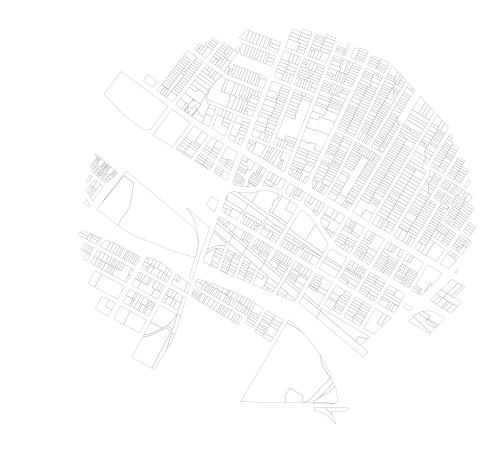

In [26]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = fruit_res[fruit_res['dist_station'] <= 804.67].plot(ax = ax, color='white', edgecolor='black', linewidth=.1)
#DPI=300
ax.set_axis_off()
#ax.set_title('Fruitvale')
plt.show()

1 square meter = 10.7639 square feet

In [27]:
fruit_res = fruit_res[fruit_res['dist_station'] <= 804.67]
mp_res = mp_res[mp_res['dist_station'] <= 804.67]
soto_res = soto_res[soto_res['dist_station'] <= 804.67]
wv_res = wv_res[wv_res['dist_station'] <= 804.67]
sl_res = sl_res[sl_res['dist_station'] <= 804.67]

fruit_res['parcel_area'] = fruit_res['geometry'].area * 10.7639
mp_res['parcel_area'] = mp_res['geometry'].area * 10.7639
soto_res['parcel_area'] = soto_res['geometry'].area * 10.7639
wv_res['parcel_area'] = wv_res['geometry'].area * 10.7639
sl_res['parcel_area'] = sl_res['geometry'].area * 10.7639

fruit_res['parcel_length'] = fruit_res['geometry'].length * 3.28084
mp_res['parcel_length'] = mp_res['geometry'].length * 3.28084
soto_res['parcel_length'] = soto_res['geometry'].length * 3.28084
wv_res['parcel_length'] = wv_res['geometry'].length * 3.28084
sl_res['parcel_length'] = sl_res['geometry'].length * 3.28084

fruit_res['parcel_quotient'] = (4 * 3.1416 * fruit_res['parcel_area']) / (fruit_res['parcel_length'] ** 2)
mp_res['parcel_quotient'] = (4 * 3.1416 * mp_res['parcel_area']) / (mp_res['parcel_length'] ** 2)
soto_res['parcel_quotient'] = (4 * 3.1416 * soto_res['parcel_area']) / (soto_res['parcel_length'] ** 2)
wv_res['parcel_quotient'] = (4 * 3.1416 * wv_res['parcel_area']) / (wv_res['parcel_length'] ** 2)
sl_res['parcel_quotient'] = (4 * 3.1416 * sl_res['parcel_area']) / (sl_res['parcel_length'] ** 2)

fruit_res.head(3)

,index,apn,apn_sort,book,centroid_x,centroid_y,clca_categ,comments,date_creat,date_updat,...,centroid,index_right,BASEZONE,OVERLAY,ZNLABEL,zone_base,dist_station,parcel_area,parcel_length,parcel_quotient
2,5,33-2127-11,033 212701100,33,6.064269e+06,2.111500e+06,None,None,2004-06-07,2004-06-07,...,POINT (568578.681897233 4181828.306297252),30.0,RM-3,None,RM-3,Multi-Family Residential,756.169981,3804.304088,303.358662,0.519485
3,6,33-2136-27-1,033 213602701,33,6.065076e+06,2.110309e+06,None,None,2004-06-07,2004-06-07,...,POINT (568834.1263461772 4181471.871597518),27.0,RM-2,None,RM-2,Multi-Family Residential,622.041286,5958.258968,345.136906,0.628561
5,8,25-722-16,025 072201600,25,6.063121e+06,2.111167e+06,None,None,2004-06-07,2004-06-07,...,POINT (568231.4671690093 4181717.232398759),33.0,RM-2,None,RM-2,Multi-Family Residential,607.809772,6653.322477,400.889705,0.520235


In [28]:
small_fruit_res = fruit_res[fruit_res['parcel_area']<20000]
small_mp_res = mp_res[mp_res['parcel_area']<20000]
small_soto_res = soto_res[soto_res['parcel_area']<20000]
small_wv_res = wv_res[wv_res['parcel_area']<20000]
small_sl_res = sl_res[sl_res['parcel_area']<20000]

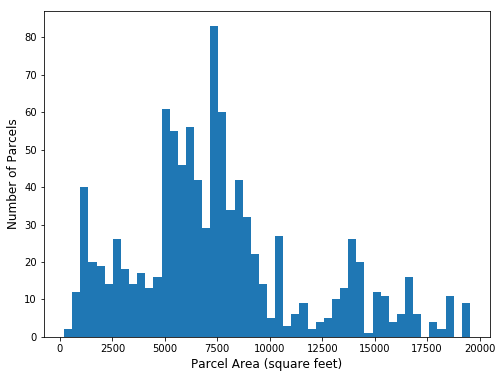

In [29]:
plt.figure(1, figsize=(8,6), )
plt.xlabel('Parcel Area (square feet)', fontsize=12)
plt.ylabel('Number of Parcels', fontsize=12)
ax = plt.hist(small_mp_res['parcel_area'], bins=50)
#plt.savefig('parcel_area_hist.png')
plt.show()

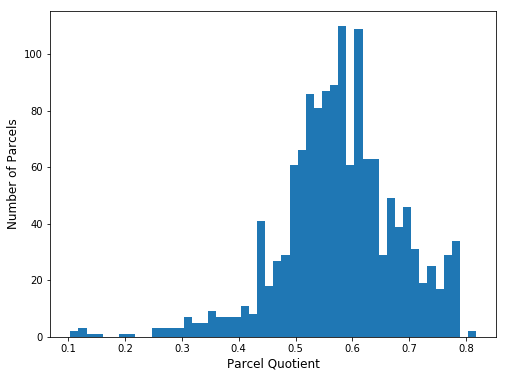

In [40]:
plt.figure(1, figsize=(8,6), )
plt.xlabel('Parcel Quotient', fontsize=12)
plt.ylabel('Number of Parcels', fontsize=12)
ax = plt.hist(small_fruit_res['parcel_quotient'], bins=50)
#plt.savefig('parcel_area_hist.png')
plt.show()

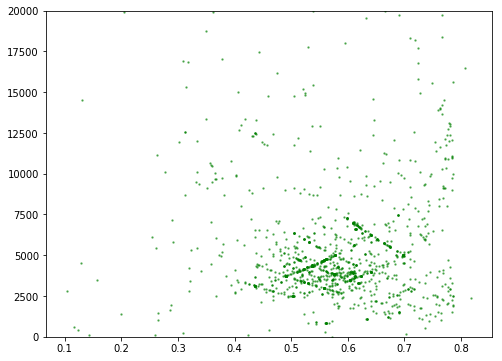

In [41]:
plt.figure(1, figsize=(8,6), )
#plt.suptitle('2014 Bay Area Rents from Craigslist Listings', fontsize=14)
#plt.xlabel('Square Feet')
#plt.ylabel('Rent')
#plt.xlim(0,5000)
plt.ylim(0,20000)
ax = plt.scatter(small_fruit_res['parcel_quotient'], small_fruit_res['parcel_area'], color='g', alpha=.5, edgecolor='g', s=2)
plt.show()

#### Now to save parcels with zoning information attached

In [42]:
fruit_res = fruit_res.set_geometry('geometry')
mp_res = mp_res.set_geometry('geometry')
soto_res = soto_res.set_geometry('geometry')
wv_res = wv_res.set_geometry('geometry')
sl_res = sl_res.set_geometry('geometry')

fruit_res.drop(['centroid'], axis=1).to_crs({'init': 'epsg:4269'}).to_file('GIS/Parcel_Zoning/Subset/fruit_res.shp')
mp_res.drop(['centroid'], axis=1).to_crs({'init': 'epsg:4269'}).to_file('GIS/Parcel_Zoning/Subset/mp_res.shp')
soto_res.drop(['centroid'], axis=1).to_crs({'init': 'epsg:4269'}).to_file('GIS/Parcel_Zoning/Subset/soto_res.shp')
wv_res.drop(['centroid'], axis=1).to_crs({'init': 'epsg:4269'}).to_file('GIS/Parcel_Zoning/Subset/wv_res.shp')
sl_res.drop(['centroid'], axis=1).to_crs({'init': 'epsg:4269'}).to_file('GIS/Parcel_Zoning/Subset/sl_res.shp')

In [45]:
fruit_res.columns

Index(['index', 'apn', 'apn_sort', 'book', 'centroid_x', 'centroid_y',
       'clca_categ', 'comments', 'date_creat', 'date_updat', 'fid_parcel',
       'page', 'parcel', 'sub_parcel', 'key', 'name', 'lat', 'lon', 'geometry',
       'centroid', 'index_right', 'BASEZONE', 'OVERLAY', 'ZNLABEL',
       'zone_base', 'dist_station', 'parcel_area', 'parcel_length',
       'parcel_quotient'],
      dtype='object')

## New last step, going back to keep all parcels within 0.5 miles and consolidate Los Angeles parcels

In [43]:
la_pz = la_pz[['assetid', 'bpp', 'name','id','lot','shape_area','zone_cmplt','zone_base','geometry']]

la_pz_agg = la_pz.dissolve(by='bpp', aggfunc='sum')

la_pz_agg['bpp'] = la_pz_agg.index

la_pz_agg = la_pz_agg.reset_index(drop=True)

la_pz_agg.head(3)

,geometry,assetid,id,shape_area,bpp
0,"POLYGON ((934773.3481443262 3778240.626414015,...",1461664.0,995.0,10536.917523,5076001002
1,"POLYGON ((934773.3481443262 3778240.626414015,...",1462316.0,1040.0,9752.354095,5076001003
2,"POLYGON ((934820.8910119338 3778209.091360629,...",2926138.0,2130.0,8004.247874,5076001004


In [44]:
la_pz.columns

Index(['assetid', 'bpp', 'name', 'id', 'lot', 'shape_area', 'zone_cmplt',
       'zone_base', 'geometry'],
      dtype='object')

In [45]:
columns = ['bpp','zone_cmplt','zone_base','name']

la_pz2 = la_pz_agg.merge(la_pz.loc[:,columns], how='left', on='bpp')

la_pz2.head(2)

,geometry,assetid,id,shape_area,bpp,zone_cmplt,zone_base,name
0,"POLYGON ((934773.3481443262 3778240.626414015,...",1461664.0,995.0,10536.917523,5076001002,R4-1,Multi-Family Residential,Wilshire / Vermont Station
1,"POLYGON ((934773.3481443262 3778240.626414015,...",1462316.0,1040.0,9752.354095,5076001003,R4-1,Multi-Family Residential,Wilshire / Vermont Station


In [46]:
fruit_pz['dist_station'] = fruit_pz['geometry'].centroid.distance(fruit_station.iloc[0,0])
mp_pz['dist_station'] = mp_pz['geometry'].centroid.distance(mp_station.iloc[0,0])

soto_pz = la_pz2[la_pz2['name']=='Soto Station'].reset_index(drop=True)
sl_pz = la_pz2[la_pz2['name']=='Allesandro / Oak Glen'].reset_index(drop=True)

soto_pz['dist_station'] = soto_pz['geometry'].centroid.distance(soto_station.iloc[0,0])
sl_pz['dist_station'] = sl_pz['geometry'].centroid.distance(sl_station.iloc[0,0])

sl_pz.head(2)

,geometry,assetid,id,shape_area,bpp,zone_cmplt,zone_base,name,dist_station
0,"POLYGON ((938357.1099595921 3781400.839169381,...",1389464.0,66.0,3712.403049,5406004015,R2-1VL,Multi-Family Residential,Allesandro / Oak Glen,1411.927589
1,"POLYGON ((938881.5560566579 3781732.860956077,...",1376423.0,17.0,860395.735207,5415005902,[Q]OS-1XL,Open Space,Allesandro / Oak Glen,1411.274155


In [47]:
fruit_pz = fruit_pz[fruit_pz['dist_station'] <= 804.67]
mp_pz = mp_pz[mp_pz['dist_station'] <= 804.67]
soto_pz = soto_pz[soto_pz['dist_station'] <= 804.67]
sl_pz = sl_pz[sl_pz['dist_station'] <= 804.67]

fruit_pz['parcel_area'] = fruit_pz['geometry'].area * 10.7639
mp_pz['parcel_area'] = mp_pz['geometry'].area * 10.7639
soto_pz['parcel_area'] = soto_pz['geometry'].area * 10.7639
sl_pz['parcel_area'] = sl_pz['geometry'].area * 10.7639

soto_pz.head(2)

,geometry,assetid,id,shape_area,bpp,zone_cmplt,zone_base,name,dist_station,parcel_area
809,"POLYGON ((941840.2788707239 3777852.293057238,...",1485661.0,99.0,1018.806169,5174006***,RD1.5-1-RIO-CUGU,Multi-Family Residential,Soto Station,669.856728,1022.910334
810,"POLYGON ((941849.4349320992 3777949.904067189,...",2965246.0,104.0,8319.267747,5174006014,RD1.5-1-RIO-CUGU,Multi-Family Residential,Soto Station,738.928652,8352.783609


In [51]:
fruit_pz.drop(['centroid'], axis=1).to_crs({'init': 'epsg:4269'}).to_file('GIS/Parcel_Zoning/half_mile/fruit_pz_all.shp')
mp_pz.drop(['centroid'], axis=1).to_crs({'init': 'epsg:4269'}).to_file('GIS/Parcel_Zoning/half_mile/mp_pz_all.shp')
soto_pz.to_crs({'init': 'epsg:4269'}).to_file('GIS/Parcel_Zoning/half_mile/soto_pz_all.shp')
sl_pz.to_crs({'init': 'epsg:4269'}).to_file('GIS/Parcel_Zoning/half_mile/sl_pz_all.shp')